In [ ]:
#Description : This is a sentiment analysis program that parses the tweet fetched from twitter using python

In [1]:
#import libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [4]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving Login.csv to Login.csv


In [5]:
#Get the data
log = pd.read_csv('Login.csv')

In [6]:
# #twitter API credentials
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

In [8]:
#Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

#Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

#Create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [13]:
#Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name = "BillGates", count="100", lang = "en", tweet_mode="extended")

#print last 5 tweets from the account
print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
  print(str(i)+ ') ' + tweet.full_text + '\n')
  i = i+1

Show the 5 recent tweets: 

1) It’s great to see India’s leadership in scientific innovation and vaccine manufacturing capability as the world works to end the COVID-19 pandemic @PMOIndia https://t.co/Ds4f3tmrm3

2) RT @lastmilehealth: The best emergency system is a strong primary health system—powered by community and frontline health workers. Now is t…

3) What does Rashida Jones have on her shopping list? That’s just one of the many questions that didn’t make it into our podcast. You can listen to some of the big questions we did tackle here: https://t.co/RJzHRUPoik https://t.co/yh63b11RSW

4) 2021 will be better than 2020. Here’s why: https://t.co/mYbpl5wwF1

5) Standing up for science has never been more important. Congratulations to Dr. Anthony Fauci and Dr. Salim Abdool Karim on receiving this honor. https://t.co/XE2NArYcE3



In [14]:
#Create a data frame with acolumn callled Tweets
df = pd.DataFrame( [tweet.full_text for tweet in posts ], columns=['Tweets'] )

#Show the first 5 rows of data
df.head()

,Tweets
0,It’s great to see India’s leadership in scient...
1,RT @lastmilehealth: The best emergency system ...
2,What does Rashida Jones have on her shopping l...
3,2021 will be better than 2020. Here’s why: htt...
4,Standing up for science has never been more im...


In [15]:
#Clean the text

#Create a func to clean the tweets
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #removed @mentions
  text = re.sub(r'#', '', text) #removing the '#' symbol
  text = re.sub(r'RT[\s]+', '', text) #Removing Retweet
  text = re.sub(r'https?:\/\/\S+','', text) #Remove the hyperlink

  return text

#Cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanText)

#show the cleaned text
df

,Tweets
0,It’s great to see India’s leadership in scient...
1,: The best emergency system is a strong primar...
2,What does Rashida Jones have on her shopping l...
3,2021 will be better than 2020. Here’s why:
4,Standing up for science has never been more im...
...,...
95,"In his final words, John Lewis challenges all ..."
96,The impacts of COVID-19 are driving worrying i...
97,: The ’s support of and is instrumental to t...
98,"In these challenging times, we can’t lose sigh..."


In [16]:
 #Create a function to get the subjectivity
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#show the dataframe with new columns
df

,Tweets,Subjectivity,Polarity
0,It’s great to see India’s leadership in scient...,0.750000,0.800000
1,: The best emergency system is a strong primar...,0.511111,0.611111
2,What does Rashida Jones have on her shopping l...,0.300000,0.250000
3,2021 will be better than 2020. Here’s why:,0.500000,0.500000
4,Standing up for science has never been more im...,0.750000,0.450000
...,...,...,...
95,"In his final words, John Lewis challenges all ...",1.000000,0.000000
96,The impacts of COVID-19 are driving worrying i...,0.391667,0.100000
97,: The ’s support of and is instrumental to t...,0.000000,0.000000
98,"In these challenging times, we can’t lose sigh...",0.875000,0.437500


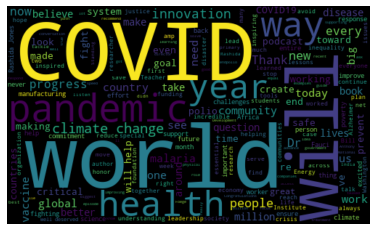

In [17]:
# Plot The Word Cloud
allWords = ' '.join([tweets for tweets in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [18]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else: 
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

#show the data frame
df


,Tweets,Subjectivity,Polarity,Analysis
0,It’s great to see India’s leadership in scient...,0.750000,0.800000,Positive
1,: The best emergency system is a strong primar...,0.511111,0.611111,Positive
2,What does Rashida Jones have on her shopping l...,0.300000,0.250000,Positive
3,2021 will be better than 2020. Here’s why:,0.500000,0.500000,Positive
4,Standing up for science has never been more im...,0.750000,0.450000,Positive
...,...,...,...,...
95,"In his final words, John Lewis challenges all ...",1.000000,0.000000,Neutral
96,The impacts of COVID-19 are driving worrying i...,0.391667,0.100000,Positive
97,: The ’s support of and is instrumental to t...,0.000000,0.000000,Neutral
98,"In these challenging times, we can’t lose sigh...",0.875000,0.437500,Positive


In [23]:
#Print all of the positive tweets
j=1
sortedDf = df.sort_values(by=['Polarity'])
for i in range(0, sortedDf.shape[0]):
  if (sortedDf['Analysis'][i] == 'Positive'):
    print( str(j) + ') ' + sortedDf['Tweets'][i])
    print()
    j = j + 1

1) It’s great to see India’s leadership in scientific innovation and vaccine manufacturing capability as the world works to end the COVID-19 pandemic  

2) : The best emergency system is a strong primary health system—powered by community and frontline health workers. Now is t…

3) What does Rashida Jones have on her shopping list? That’s just one of the many questions that didn’t make it into our podcast. You can listen to some of the big questions we did tackle here:  

4) 2021 will be better than 2020. Here’s why: 

5) Standing up for science has never been more important. Congratulations to Dr. Anthony Fauci and Dr. Salim Abdool Karim on receiving this honor. 

6) I've known and learned from  for more than 40 years. I'm glad to see  team up with  to mentor and support companies working to create more economic empowerment opportunities for people across the world. 

7) This book has nothing to do with viruses or pandemics. But it is surprisingly relevant for these times.  provides a

In [25]:
#print the negative tweets
j=1
sortedDf = df.sort_values(by=['Polarity'])
for i in range(0, sortedDf.shape[0]):
  if (sortedDf['Analysis'][i] == 'Negative'):
    print( str(j) + ') ' + sortedDf['Tweets'][i])
    print()
    j = j + 1


1) We need to revolutionize the world’s physical economy—and that will take, among other things, a dramatic infusion of ingenuity, funding, and focus from the federal government.

2) Nearly forty million people have Alzheimer’s or dementia today. We have no way to stop or even slow the disease at this point, but I’m hopeful the new Alzheimer’s Disease Data Initiative () will speed up progress. 

3) : Even with his busy schedule, Dr. Fauci took the time to sit down with me (AGAIN) and talk about what we’ve gotten right…

4) : What do COVID-19 and malaria have to do with each other?  

When COVID-19 struck, it disrupted the entire global healt…

5) To prevent the worst effects of climate change, we need innovation across all sectors—especially in the hardest to decarbonize sectors—to get us on a viable path to net-zero emissions. 

6) Because of long-standing barriers that are made worse by COVID-19, hundreds of thousands of students with promise may never start college. This would be di

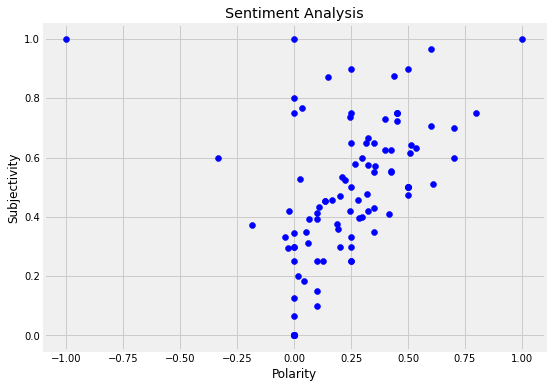

In [26]:
#Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [27]:
#Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round(ptweets.shape[0] / df.shape[0] *100 , 1)

76.0

In [28]:
#Get the percentage of negative tweets
ptweets = df[df.Analysis == 'Negative']
ptweets = ptweets['Tweets']

round(ptweets.shape[0] / df.shape[0] *100 , 1)

6.0

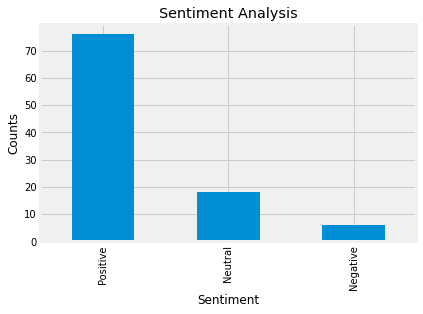

In [30]:
#show the value counts

df['Analysis'].value_counts()

#plot and visualize the counts
plt.title("Sentiment Analysis")
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()